# Import the necessary libraries


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


# Generate synthetic data (two point classes)

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html


In [3]:
X, y = datasets.make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42)


# Split the data into training and test sets

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


# Create and train the SVM model

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC


In [5]:
svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(X_train, y_train)


SVC(C=1, kernel='linear')

# Output the classification accuracy on the test set

A method `score` on an estimator, usually a predictor, which evaluates its predictions on a given dataset, and returns a single numerical score. A greater return value should indicate better predictions; accuracy is used for classifiers and $R^2$ for regressors by default.

If the estimator was not already fitted, calling this method should raise a exceptions.NotFittedError.

Some estimators implement a custom, estimator-specific score function, often the likelihood of the data under the model.

In [6]:
accuracy = svm_classifier.score(X_test, y_test)
print(f'Classification accuracy: {accuracy:.2f}')


Classification accuracy: 1.00


# Create a grid to visualize the solution boundary


In [7]:
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1,
                                 X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1,
                                 X[:, 1].max() + 1, 100))
Z = svm_classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


# Data visualization and decision boundaries


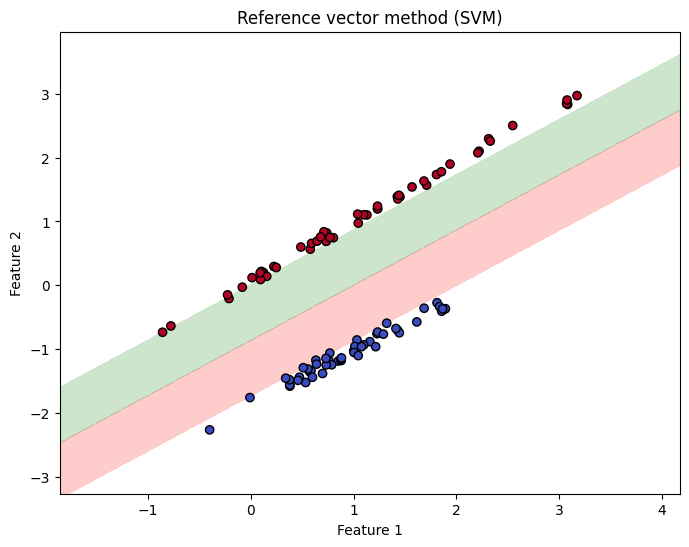

In [8]:
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z,
             levels=[-1, 0, 1],
             colors=['r', 'g', 'b'], alpha=0.2)
plt.scatter(X[:, 0], X[:, 1], c=y,
            cmap=plt.cm.coolwarm,
            edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Reference vector method (SVM)')
plt.show()
